# Uttar Pradesh Crime Analysis
#By- Shubham Kumar
#Dated: July 12,2021

In [1]:
from IPython.display import Image
Image(url='https://www.gannett-cdn.com/-mm-/4a94aaab8e826ca8563bd0e434c9fe36f1dc920f/c=0-0-399-300&r=x404&c=534x401/local/-/media/2016/07/20/FortMyers/FortMyers/636046215443097272-CRIME-gen-NP.jpg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set()

/home/aarush100616/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv(r'/home/aarush100616/Downloads/Projects/Uttar Pradesh Crime Analysis/MR data - Compiled Data Set.csv')

In [4]:
df

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,"Minor molests mute girl, sent to observation home",GHAZIABAD: A 12-year-old boy was sent to an ob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,Family out to buy car robbed of Rs 1 lakh by b...,GHAZIABAD: A family that had visited an automo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,"This gang posed as cops to extort youths, couples",GHAZIABAD: Five persons were arrested on Monda...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,"Residents object to loud music, thrashed in Gh...","Ghaziabad: Four tenants, including two soldier...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,Man kills self after being refused money for d...,GHAZIABAD: A 25-year-old allegedly committed s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Lucknow,"Top cop stirs row, says girl filed case after ...",LUCKNOW: Hours after the horrific crime in Unn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1.0,NaN
462,Lucknow,Unnao girl passes away after 40-hour battle fo...,LUCKNOW/UNNAO: The Unnao gang-rape survivor wh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN
463,Lucknow,"Lucknow: Stalker thrashes dad, girl poisons he...",LUCKNOW: A 17-year-old girl consumed poison at...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,8",NaN,1.0
464,Lucknow,Uttar Pradesh: Woman accuses boss of harassment,LUCKNOW: A 30-year-old employee of a real esta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1.0,NaN


In [5]:
#droping title and text columns
x_full = df.drop(axis = 1, labels = ['Title','Text'])

In [6]:
#Renaming big column names(cleaning)
x_full = x_full.rename(columns = {'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other':'Murder Reason', 'Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act':'crime against women(Act)'})
x_full.columns

Index(['City ', 'Murder Reason', 'Number of child victims',
       'Number of male victims(adult)', 'Number of female victims(adult)',
       'Kidnnaping:\nNumber of child victims', 'Number of male(adult) ',
       'Number of female(adult)', 'crime against women(Act)',
       'Number of adult victims', 'Number of childs invoved'],
      dtype='object')

In [7]:
#drop rows with all null values apart from 'City '( cleaning )
x_full = x_full.dropna(axis = 0, subset= ['City '], how = 'all')

In [8]:
#checking Null Values
x_full.isnull().sum()

City                                      0
Murder Reason                           319
Number of child victims                 453
Number of male victims(adult)           371
Number of female victims(adult)         419
Kidnnaping:\nNumber of child victims    455
Number of male(adult)                   458
Number of female(adult)                 463
crime against women(Act)                266
Number of adult victims                 350
Number of childs invoved                381
dtype: int64

In [9]:
#replacing NaN values in "number of" type and NaN values in crime agaisnt women column with 0 
x_full = x_full.fillna(0)

In [10]:
#seperating acts
crime_acts = x_full['crime against women(Act)'].astype('string').values
for i in range(1,11):
    x_full.insert(8+i,"Act {}".format(i),0)
for j in range(len(crime_acts)):
    splitted = crime_acts[j].split(',')
    for x in splitted:
        if x=='0':
            continue
        x_full.loc[int(j),'Act {}'.format(x.strip())]=1
x_full

,City,Murder Reason,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),crime against women(Act),Act 1,...,Act 4,Act 5,Act 6,Act 7,Act 8,Act 9,Act 10,Number of adult victims,Number of childs invoved,Act 11
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0,...,0,0,0,0,1,0,1,0.0,3.0,NaN
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,...,0,0,0,1,0,0,0,1.0,0.0,NaN
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,...,0,0,0,0,0,0,0,1.0,0.0,NaN
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0,...,0,0,0,0,1,0,0,0.0,1.0,NaN
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,0,...,0,0,0,0,1,0,0,1.0,0.0,NaN


## City-wise Crime Report

[Text(0.5, 1.0, 'city-wise crime count')]

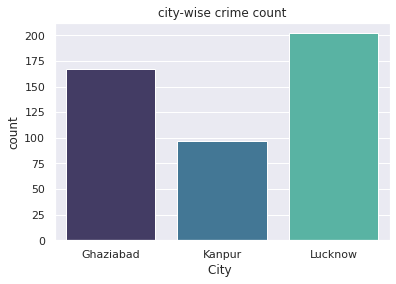

In [11]:
sns.countplot(x = 'City ', data = x_full, palette = 'mako').set(title = 'city-wise crime count')

## Reasons For Murder

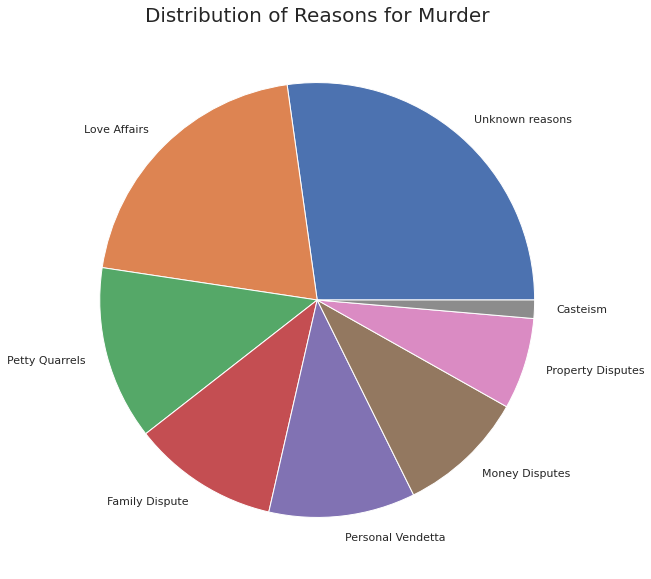

In [12]:
plt.figure(figsize = (10,10))
reason = x_full['Murder Reason'].value_counts().to_dict()
reason.pop(0)
val = list(reason.values())
label = list(reason.keys())
plt.title('Distribution of Reasons for Murder',fontsize = 20)
plt.pie(x = val,labels = label)
plt.show()

## Love Affair victims Gender Distribution

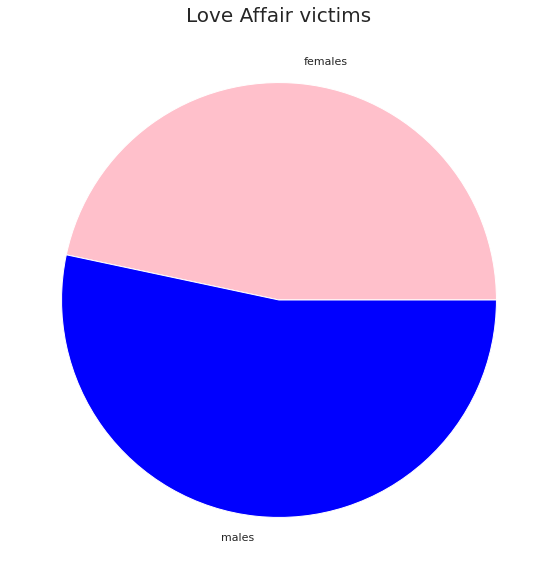

In [13]:
#love affairs victims
mv = x_full.loc[x_full['Murder Reason'] == 'Love Affairs', "Number of male victims(adult)"].sum()
fv = x_full.loc[x_full['Murder Reason'] == 'Love Affairs', "Number of female victims(adult)"].sum()
plt.figure(figsize = (10,10))
plt.title('Love Affair victims',fontsize = 20)
plt.pie(x = [mv,fv],labels = ['females','males'],colors = ['pink','blue'])
plt.show()

## What crimes are causing women's death?

<AxesSubplot:xlabel='Murder Reason', ylabel='count'>

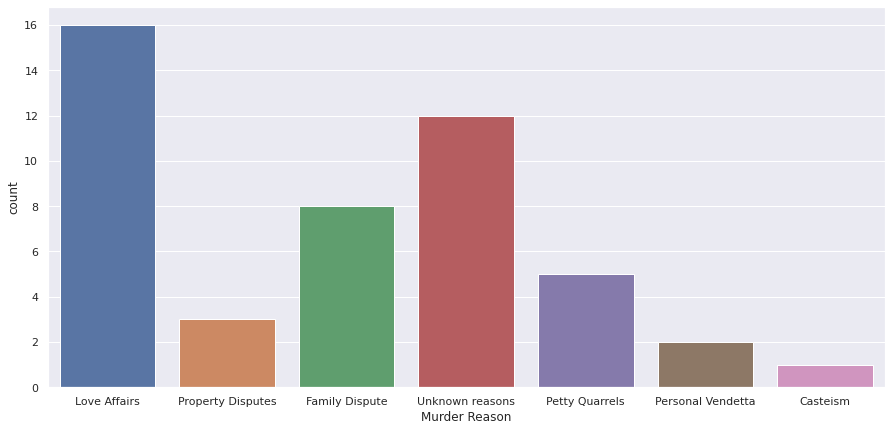

In [14]:
#what is the biggest cause of women's death
wmr = x_full.loc[x_full['Number of female victims(adult)']>0]
plt.figure(figsize = (15,7))
sns.countplot(x = 'Murder Reason', data = wmr)

## Cause of men's death

<AxesSubplot:xlabel='Murder Reason', ylabel='count'>

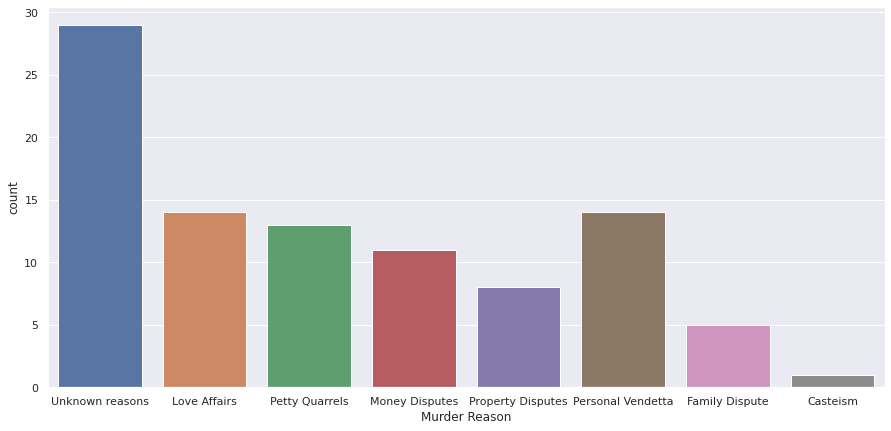

In [15]:
wmr = x_full.loc[x_full['Number of male victims(adult)']>0]
plt.figure(figsize = (15,7))
sns.countplot(x = 'Murder Reason', data = wmr)

## Distribution of Crime Againt Women on basis of Acts

<BarContainer object of 10 artists>

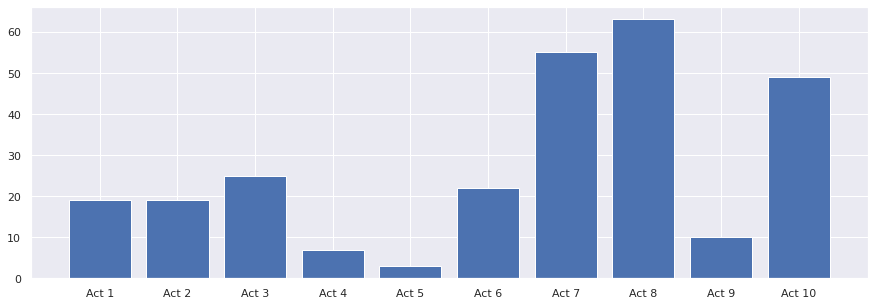

In [16]:
s = x_full.iloc[:,9:(9+10)].sum()
plt.figure(figsize = (15,5))
plt.bar(s.index,s.values)

## Reasons:
-Murder with Rape
-Dowry Deaths(Sec. 3048)
-Suicide(sec 305/306)
-Kidnapping(All)
-Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)
-Rape only(Sec. 376 or 511 IPC)
-Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)
-Cyber Crimes against Women
-Protection of Children from Sexual Offences Act

## Property Disputes

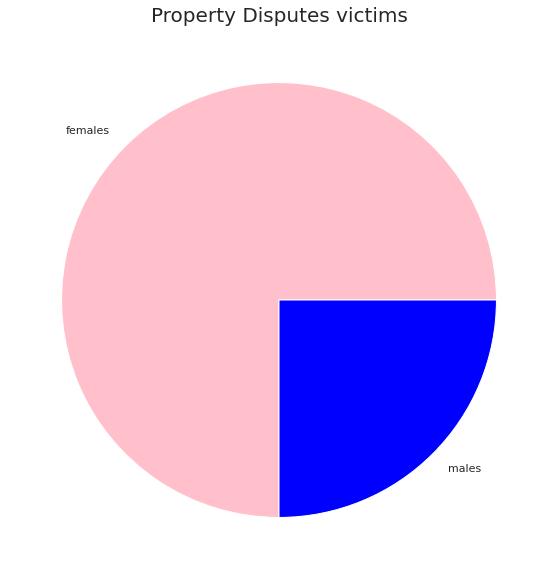

In [17]:
mv = x_full.loc[x_full['Murder Reason'] == 'Property Disputes', "Number of male victims(adult)"].sum()
fv = x_full.loc[x_full['Murder Reason'] == 'Property Disputes', "Number of female victims(adult)"].sum()
plt.figure(figsize = (10,10))
plt.title('Property Disputes victims',fontsize = 20)
plt.pie(x = [mv,fv],labels = ['females','males'],colors = ['pink','blue'])
plt.show()

## Female vs Male involvement

[Text(0.5, 1.0, 'Involved in Crime')]

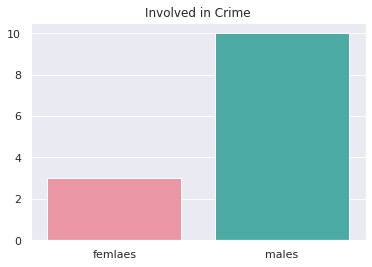

In [18]:
#females vs males crime
sns.set_palette("BrBG",1)
females = x_full['Number of female(adult)'].sum()
males = x_full['Number of male(adult) '].sum()
sns.barplot(x= ['femlaes','males'], y= [females, males]).set(title = 'Involved in Crime')

## Children vs Adulit Victims

[Text(0.5, 1.0, 'Victims of UP Crime')]

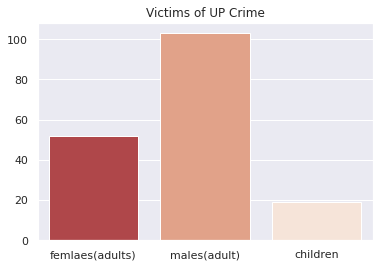

In [19]:
#Children vs Adults victims in crime city-wise
sns.set_palette("RdBu",)
females = x_full['Number of female victims(adult)'].sum()
males = x_full['Number of male victims(adult)'].sum()
child = x_full['Number of child victims'].sum()
sns.barplot(x= ['femlaes(adults)','males(adult)','children'], y= [females, males, child]).set(title = 'Victims of UP Crime')

## City-wise Child victims

[Text(0.5, 1.0, 'city-wise child victims')]

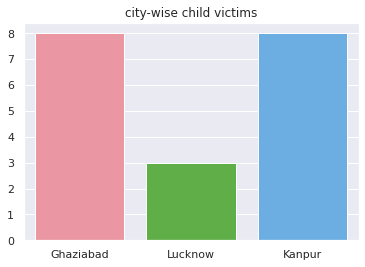

In [20]:
#child victims city-wise
sns.set_palette("YlOrBr", 1)
gbd = x_full.loc[x_full['City '] == 'Ghaziabad' , 'Number of child victims' ].sum()
lkw = x_full.loc[x_full['City '] == 'Lucknow' , 'Number of child victims' ].sum()
knp = x_full.loc[x_full['City '] == 'Kanpur' , 'Number of child victims' ].sum()
sns.barplot(y = [gbd,lkw,knp], x = ['Ghaziabad','Lucknow', 'Kanpur']).set(title = 'city-wise child victims')

[Text(0.5, 1.0, 'city-wise child kidnappings')]

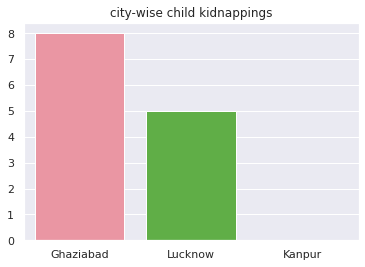

In [21]:
sns.set_palette("YlOrBr", 1)
gbd = x_full.loc[x_full['City '] == 'Ghaziabad' , 'Kidnnaping:\nNumber of child victims' ].sum()
lkw = x_full.loc[x_full['City '] == 'Lucknow' , 'Kidnnaping:\nNumber of child victims' ].sum()
knp = x_full.loc[x_full['City '] == 'Kanpur' , 'Kidnnaping:\nNumber of child victims' ].sum()
sns.barplot(y = [gbd,lkw,knp], x = ['Ghaziabad','Lucknow', 'Kanpur']).set(title = 'city-wise child kidnappings')